<a href="https://colab.research.google.com/github/shrutidhingra05/Quiz-App/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Predict Sales on using Total(Unit Price * Quantity)

In [14]:
df = pd.read_csv("/content/SuperMarket Analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.drop(['Invoice ID', 'Date', 'Time'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [17]:
df['Total'] = df['Unit price'] * df['Quantity']

In [18]:
X = df.drop('Total', axis=1)  # 'Total' is the sales value we want to predict
y = df['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = lr.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 1.723112030717877e-26
R^2 Score: 1.0


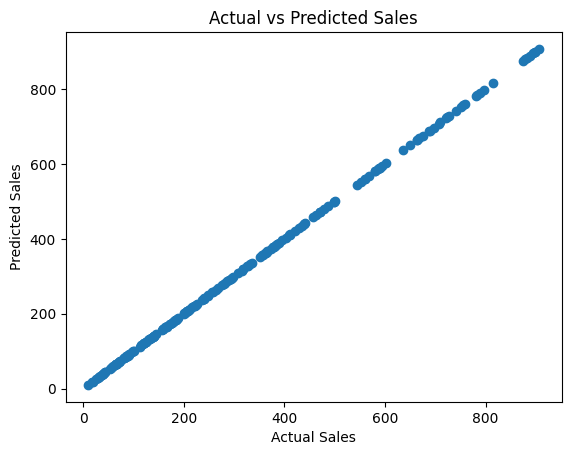

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

Predict Sales on other features.

In [28]:
df = pd.read_csv("/content/SuperMarket Analysis.csv")
df_original = df.copy()
print(df.columns.tolist())

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [31]:
print('Total' in df.columns)  # should return True

False


In [32]:
df['Total'] = df['Unit price'] * df['Quantity']

In [33]:
df_original = df.copy()


In [34]:
y = df_original['Total']

In [36]:
from sklearn.model_selection import train_test_split

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded  # Features (indirect)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


R² Score: 0.999999999999998
MSE: 1.1747518922483868e-10


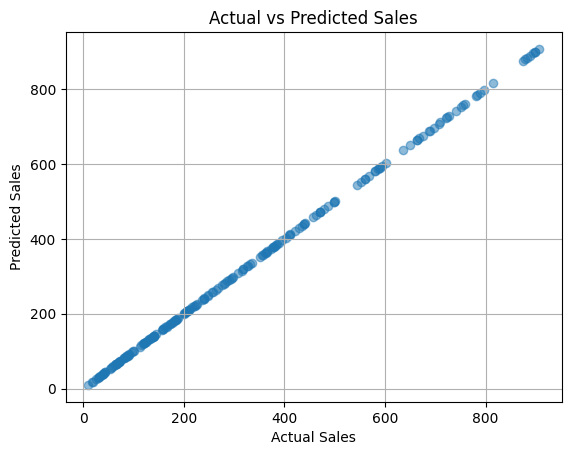

In [37]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualize
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()